# Computing customer data
### 1) Predited purchases per customer
### 2) Customer Lifetime Value (CLV)

#### See https://github.com/CamDavidsonPilon/lifetimes for info

CLV is the present value of the future (net) cash flows associated with the customer (Gupta and Lehmann 2003). <br> 
It is a forward-looking concept, not to be confused with historic customer profitability.

## Import libraries & Data

In [1]:
import sys
import os
import re
import math

import numpy as np
import scipy as sp
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import plotnine as p9
# sns.set_context("poster")
# sns.set(rc={'figure.figsize': (16, 9.)})
# sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import logging
logging.basicConfig(level=logging.INFO, stream=sys.stdout)

display_settings = {
    'max_columns': 50,
    'expand_frame_repr': True,  # Wrap to multiple pages
    'max_rows': 50,
    'precision': 2,
    'show_dimensions': True
}

for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)

from IPython.display import clear_output
import timeit

# Set figure size for easier reading
plt.rcParams['figure.figsize'] = (16,8)

In [2]:
# Import BI dataset /.csv
## Set path
country = 'AT'
path = 'u:\\Projects\\datasets\\customer_history'
file = 'customer_club_hist_JHL_'+country+'_01012018_01012020_No_M_F_R_-1.csv'
os.chdir(path)
os.getcwd()

## Import data
files = os.listdir()
df = pd.read_csv(files[files.index(file)],sep=',', 
                 header = 0,
                 decimal=",")

ValueError: 'customer_club_hist_JHL_AT_01012018_01012020_No_M_F_R_-1.csv' is not in list

In [3]:
path = 'u:\\Projects\\datasets\\customer_history\\DeFacto_scores'
file = 'Orsay_Promo_salesforce_January_2020.csv'
os.chdir(path)
os.getcwd()

## Import data
files = os.listdir()
df_defacto = pd.read_csv(files[files.index(file)],sep=';', 
                          header = 0,
                          decimal=",")

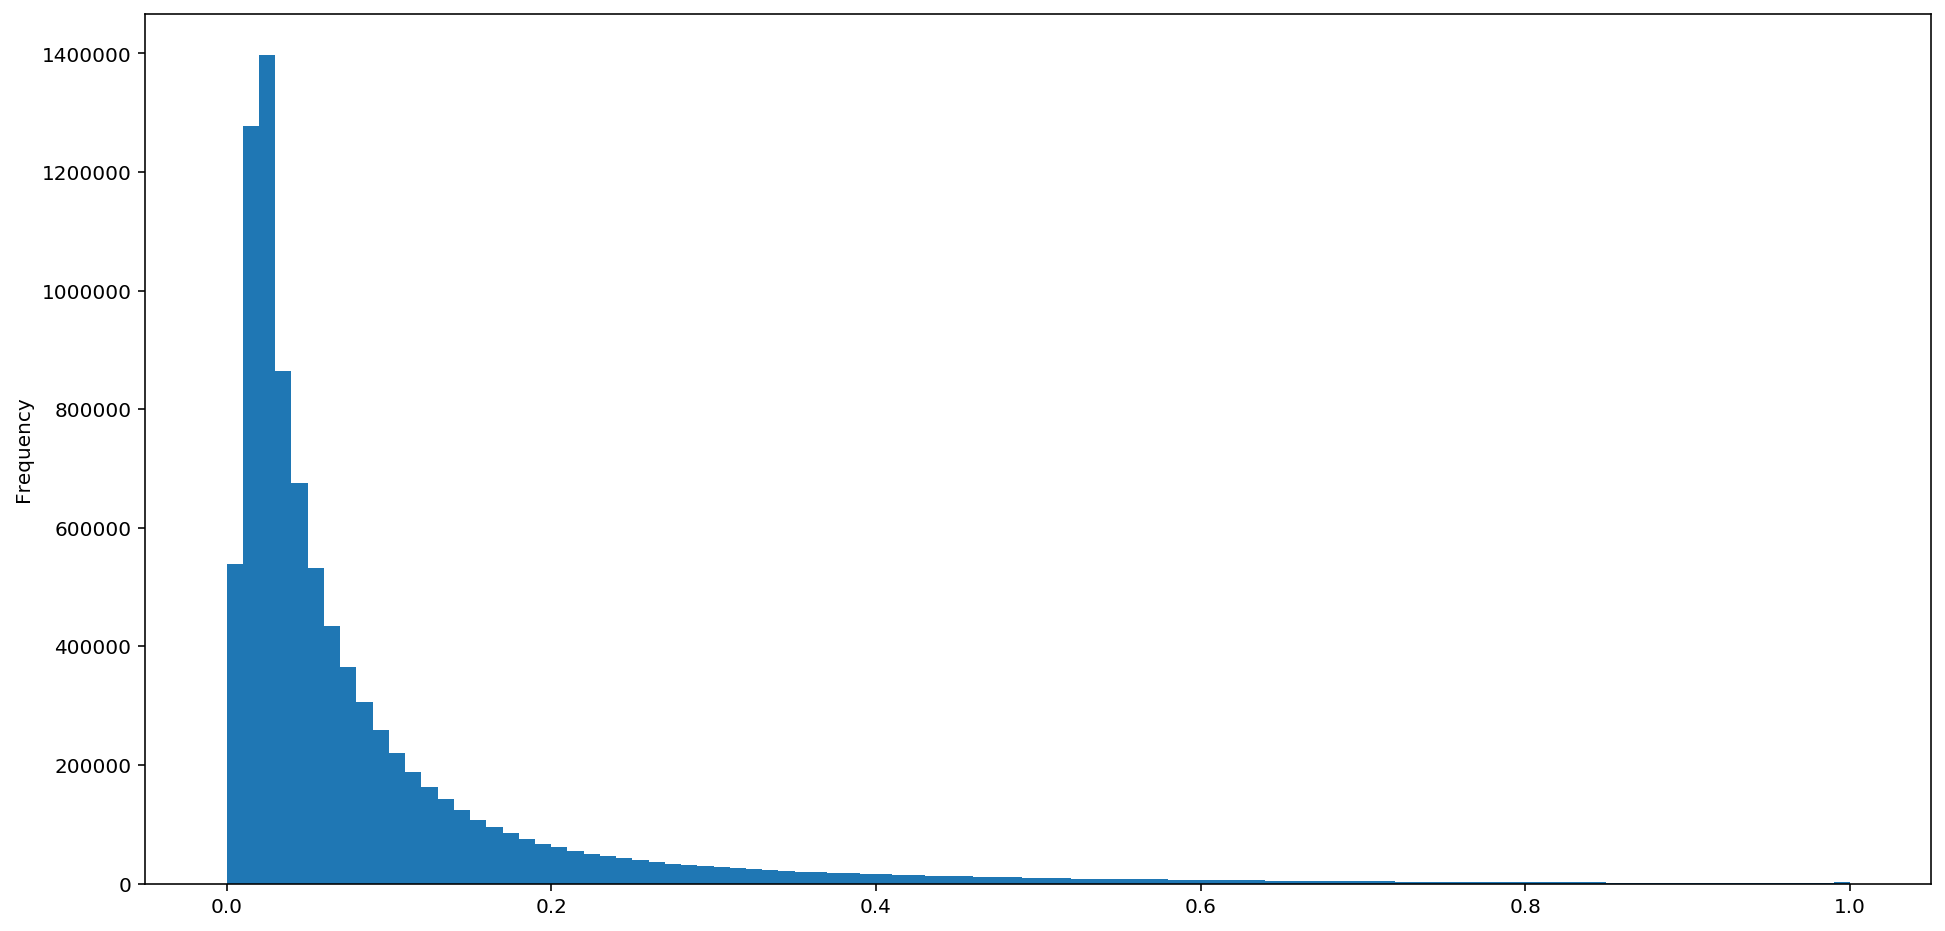

In [4]:
df_defacto.Score.plot(kind= 'hist', bins=100)

In [2]:
# Import ECom data
path = 'U:\\Projects\\datasets\\customer_history'
os.chdir(path)
df_ecom = pd.read_csv('customer_ecom_nonclub_hist_JHL_AT_01012018_01012020_No_M_F_R_-1.csv')

In [6]:
df_ecom.groupby(by='Email').count().sort_values('Customer Number')

,Customer Number,Club Card Number,Date,Order number,Order margin value with VAT Euro,Offer code
Email,,,,,,
guest12345@pasibo.de,0,1,1,1,1,1
maria.rist@aon.at,1,1,1,1,1,1
maria.sandhofer@aon.at,1,1,1,1,1,1
maria.schaffenrath@hotmail.com,1,1,1,1,1,1
maria.schlager@gmx.at,1,1,1,1,1,1
...,...,...,...,...,...,...
SindyKrenzel@gmail.com,156,156,156,156,156,156
anitag15@gmx.net,211,211,211,211,211,211
veronikaschober@gmx.at,263,263,263,263,263,263


In [2]:
# Import the SFID & Email links
path = 'U:\\Projects\\datasets\\mails\\mc'
os.chdir(path)
df_segment = pd.read_csv('Export_ClientInfo20200128.csv',
                         sep = ';',
                         encoding='utf-16',
                         #usecols=["SubscriberKey", "Email"],
                        )

C:\Users\jhernandez-lallement\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
df_segment.shape

(2853801, 51)

In [3]:
pwd

'U:\\Projects\\datasets\\mails\\mc'

In [37]:
df = (df_segment
.loc[df_segment.ScoreGroup == 'Regain']
#.AssociatedAccountID
#.str
#.cat(sep=';')
#.to_csv('hugues.txt', 
#        header=None, 
#        index=None, 
        #sep=';',
        #mode='a'
     )

In [21]:
all_SFID = pd.read_csv('hugues3.csv')
all_SFID = all_SFID.rename(columns={'Customer Salesforce ID': 'SubscriberKey',
                                    'Turnover with VAT Euro': 'turnover'})

In [28]:
all_SFID = all_SFID.assign(turnover2 = lambda d: d['turnover'].str.replace(',', '.'))

In [44]:
pd.merge(df, all_SFID, on='SubscriberKey', how='left')['turnover2'].dropna().values.astype(float).mean()

26.475473875730593

In [49]:
array = pd.merge(df, all_SFID, on='SubscriberKey', how='left')['turnover2'].dropna().values.astype(float)

In [52]:
array[array > 0].mean()

33.56996160151663

In [8]:
df_segment = df_segment[['SubscriberKey',
                         'Email']]
df_segment = df_segment.rename(columns={'SubscriberKey': 'SFID'})

In [9]:
df_segment.Email

0                              lavy24vidu@yahoo.it
1                           andrewcars80@gmail.com
2                                    novea@mail.ru
3                                   j.praum@gmx.de
4          karin.demuth@patrick-goehler-holding.de
                            ...                   
2853796                         sarahmohren@web.de
2853797                       agnryd1312@gmail.com
2853798                  petra.moravcova3@email.cz
2853799                         lisa_bucher@gmx.at
2853800                              bg1000@gmx.de
Name: Email, Length: 2853801, dtype: object

In [10]:
ecom_clients_to_add = df_ecom.merge(df_segment, on= 'Email', how='inner')
ecom_clients_to_add

,Customer Number,Club Card Number,Date,Order number,Order margin value with VAT Euro,Email,Offer code,SFID
0,3.00e+09,-1,2018/01/01 00:00:00,730163181,"44,9783332",anita.mittlinger@gmx.net,-1,0035800000xyb6DAAQ
1,3.00e+09,-1,2018/01/06 00:00:00,730164854,"32,792",anita.mittlinger@gmx.net,90515,0035800000xyb6DAAQ
2,3.00e+09,-1,2018/01/01 00:00:00,730163215,"14,305",birgit.huettmayr@gmail.com,-1,0035800001HaXRjAAN
3,3.00e+09,-1,2018/01/01 00:00:00,730163226,"44,7046665",revelantluca@aon.at,-1,0035800000HUZnFAAX
4,1.00e+08,-1,2018/01/01 00:00:00,730163274,"104,3289998",kathrin_09@hotmail.com,-1,0035800001YSvX3AAL
...,...,...,...,...,...,...,...,...
20853,4.01e+09,-1,2020/01/01 00:00:00,17008659490,"30,0223331",emira_ademovic@hotmail.com,-1,0031i00000RygmTAAR
20854,4.01e+09,-1,2020/01/01 00:00:00,17008659633,"13,7993333",binder.gabriele@gmx.at,-1,0031i00000RE5Q2AAL
20855,4.01e+09,-1,2020/01/01 00:00:00,17008659999,"23,387",kury.michaela@gmail.com,-1,0031i00000RyitvAAB
20856,4.01e+09,-1,2020/01/01 00:00:00,17008661211,"15,8706666",janine.rogi@yahoo.de,-1,0031i00000RyjeXAAR


## Munge Data

In [11]:
# Munging pipeline
# The model only looks at customers that have a club membership
def start_pipeline(df):
    dataf = df.copy()
    return dataf

def select_valid_cards(dataf):
    print('f/ select_valid_cards cleaned: ' 
          + str((dataf['Club card number'] > 1000).eq(0).sum())
          + ' (i.e., ' + str(((((dataf['Club card number'] > 1000).eq(0).sum()) / dataf.shape[0])*100).round(decimals=2))
          + '% of initial data)'
          + ' entries from input dataf.')
    return dataf[dataf['Club card number'] > 1000]

def exclude_test_cards(dataf):
    dataf = dataf.loc[~(dataf['Club card number'] == 8888888888)]
    return dataf

def lower_cols(dataf):
    dataf.columns = [c.lower() for c in dataf.columns]
    dataf.columns = [c.replace(' ', '_') for c in dataf.columns]
    return dataf

def def_types(dataf):
    dataf['turnover_with_vat_euro'] = dataf['turnover_with_vat_euro'].astype(float)
    return dataf

def correct_timestamps(dataf):
    return (dataf
     .assign(club_card_first_receipt_date = pd.to_datetime(dataf['club_card_first_receipt_date'],
                                                           format="%Y/%m/%d %H:%M:%S"))
     .assign(club_card_last_receipt_date  = pd.to_datetime(dataf['club_card_last_receipt_date'],
                                                           format="%Y/%m/%d"))
     .assign(receipt_date = pd.to_datetime(dataf['date'], format="%Y/%m/%d")))

def down_sample(dataf, threshold=100000):
    dataf = dataf.head(threshold)
    return dataf


def correct_for_retourned(dataf): 
    
    retourning_customers = (dataf
    .groupby(by='club_card_number')
    .apply(lambda d: pd.Series({"retoured": d['count_receipts'].eq(0).sum()})))
    # Select only customers with at least one retour
    retourning_customers = retourning_customers[retourning_customers.retoured != 0]
    # I want to store the amount retoured just in case
    dataf['amount_retour'] = np.nan

    # Timing 
    start = timeit.default_timer()
    clear_output(wait=True)
    # Loop over customers
    for iCustomer in range(0,len(retourning_customers)):
        clear_output(wait=True)
        #curr_dat = dataf.loc[dataf['club_card_number'] == 220041636]
        curr_dat = dataf.loc[dataf['club_card_number'] == retourning_customers.index[iCustomer]]
        # Get position of index for retours for customers i
        pos_retours = curr_dat.index[curr_dat['count_receipts'].eq(0) == True].tolist()

        # Loop over retours
        for iRetour in range(0, len(pos_retours)):

            # Isolate data until that retour, and flip array to find first plausible receipt associated with retour
            temp = curr_dat['turnover_with_vat_euro'].loc[:pos_retours[iRetour]].iloc[::-1]
            # Find first receipt occurence with amount > that abs amount of return, then stop
            to_subtract = np.argmax(temp>=abs(float(temp.iloc[0])))
            correct_val = dataf.loc[to_subtract, ['turnover_with_vat_euro']].values + temp.iloc[0]
            # Correct entry in current data since the process is iterative
            curr_dat.loc[to_subtract, ['turnover_with_vat_euro']] = correct_val
            curr_dat.loc[to_subtract, ['amount_retour']] = abs(float(temp.iloc[0]))
            # Correct entry in main dataframe
            dataf.loc[to_subtract, ['turnover_with_vat_euro']] = correct_val
            dataf.loc[to_subtract, ['amount_retour']] = abs(float(temp.iloc[0]))

        stop = timeit.default_timer()

        # Exlude the first 1 minute(s)
        baseline = 1 # how many minutes to calculcate expected time
        if (iCustomer/len(unique_customer_id) * 100) < baseline:
            expected_time = "Calculating... waiting "

        else:
            time_perc = timeit.default_timer()
            expected_time = np.round(((time_perc-start) / (iCustomer/len(retourning_customers)))/60,2)

        print("Current progress:", np.round(iCustomer/len(retourning_customers) * 100, 2), "%")
        print("Current run time:", np.round((stop-start) / 60,2), "minutes")
        print("Expected run time:", expected_time, "minutes")
        
    return dataf

def drop_retours(dataf):    
    dataf = dataf.loc[dataf['count_receipts'] > 0]
    return dataf

def drop_neg_monetary_val(dataf):
    dataf = dataf.loc[dataf['turnover_with_vat_euro'] >= 0]
    return dataf

In [12]:
# Munging pipeline ECOM
def start_pipeline_ecom(df):
    dataf = df.copy()
    return dataf

def rename_cols_ecom(dataf):
    dataf = dataf.rename(columns={
        'order_margin_value_with_vat_euro': 'turnover_with_vat_euro',
        'order_number': 'receipt_id',
        'customer_number': 'eshop_id'
    })
    return dataf

def correct_timestamps_ecom(dataf):
    return (dataf
     .assign(date = pd.to_datetime(dataf['date'],format="%Y/%m/%d %H:%M:%S"))
           )

def def_types_ecom(dataf):
    dataf['eshop_id'] = dataf['eshop_id'].round(decimals=0)
    return dataf

def drop_cols(dataf):
    dataf = dataf.drop(columns={'offer_code', 'email'})
    return dataf

In [13]:
df_ecom_clean = (ecom_clients_to_add
.pipe(start_pipeline_ecom)
.pipe(lower_cols)
.pipe(rename_cols_ecom)
.pipe(correct_timestamps_ecom)
.pipe(def_types_ecom)
.pipe(drop_cols)                 
                )
df_ecom_clean 

,eshop_id,club_card_number,date,receipt_id,turnover_with_vat_euro,sfid
0,3.00e+09,-1,2018-01-01,730163181,"44,9783332",0035800000xyb6DAAQ
1,3.00e+09,-1,2018-01-06,730164854,"32,792",0035800000xyb6DAAQ
2,3.00e+09,-1,2018-01-01,730163215,"14,305",0035800001HaXRjAAN
3,3.00e+09,-1,2018-01-01,730163226,"44,7046665",0035800000HUZnFAAX
4,1.00e+08,-1,2018-01-01,730163274,"104,3289998",0035800001YSvX3AAL
...,...,...,...,...,...,...
20853,4.01e+09,-1,2020-01-01,17008659490,"30,0223331",0031i00000RygmTAAR
20854,4.01e+09,-1,2020-01-01,17008659633,"13,7993333",0031i00000RE5Q2AAL
20855,4.01e+09,-1,2020-01-01,17008659999,"23,387",0031i00000RyitvAAB
20856,4.01e+09,-1,2020-01-01,17008661211,"15,8706666",0031i00000RyjeXAAR


In [14]:
df_clean = (df
.pipe(start_pipeline)
.pipe(select_valid_cards)
.pipe(exclude_test_cards)
.pipe(lower_cols)            
.pipe(correct_timestamps)
.pipe(def_types)
.pipe(drop_neg_monetary_val)
#.pipe(down_sample, threshold=50000)
#.pipe(correct_for_retourned)
.pipe(drop_retours)            
)


print('')
print('There are ' + str(df_clean.groupby(by='club_card_number').count().shape[0]) + ' customers.')

f/ select_valid_cards cleaned: 595998 (i.e., 15.78% of initial data) entries from input dataf.

There are 682148 customers.


In [15]:
# Make ML Club Member pipeline

# I am selecting only customers that started club membership after a particular date
# Some changes in comm might have happened before and I am not sure how that 
#  would influence the model so I restrict to this data

def select_recent_members(dataf,timestamp_bef='2018-01-01T00',timestamp_aft='2020-01-01T00', **options):
    if options.get("action") == "after":
        dataf = dataf.loc[dataf['club_card_first_receipt_date'].sort_values() > pd.Timestamp(timestamp_bef)]
    #return dataf
    if options.get("action") == "between":
        dataf = (dataf
                 .loc[dataf['club_card_first_receipt_date'].sort_values() >= pd.Timestamp(timestamp_bef)]
                 .loc[dataf['club_card_first_receipt_date'].sort_values() <= pd.Timestamp(timestamp_aft)])        
    return dataf.reset_index(drop=True)

# Last receipt date should not happened after upper benchmark
def select_receipt_dates(dataf, upper_benchmark = '2020-01-01T00'):
    dataf = dataf[dataf['club_card_last_receipt_date'] <= pd.Timestamp(upper_benchmark)]
    return dataf
    
def compute_age_recency(dataf,timestamp_ref='2020-01-01T00'):
    return (dataf
    .assign(age_in_weeks     = lambda d: (pd.Timestamp(timestamp_ref)# pd.to_datetime("now") 
                                        - d['club_card_first_receipt_date']).dt.days / 7)
    .assign(recency_in_weeks = lambda d: (d['club_card_last_receipt_date'] 
                                        - d['club_card_first_receipt_date']).dt.days / 7))

def rename_cols_ml(dataf):
    return dataf.rename(columns={#"age_in_weeks": "T",
                                  #"recency_in_weeks": "recency",
                                  "count_receipts": "frequency",
                                  "turnover_with_vat_euro": "monetary_value",
                                  "date": "receipt_issue_date",
                                  "customer_salesforce_id": "sfid"
                                })

def select_ml_data(dataf):
    return dataf[['sfid', 
                  'club_card_number',
                  'age_in_weeks', 
                  'recency_in_weeks', 
                  'frequency',
                  'monetary_value',
                  'receipt_issue_date']]


# When clients return items, the count_receipt is = 0
def filter_out_retour(dataf):
    return dataf[~dataf['frequency'].eq(0)]

In [16]:
# Make Ecom NonClub ML pipeline
# Last receipt date should not happened after upper benchmark
def select_receipt_dates_ecom(dataf, upper_benchmark = '2020-01-01T00'):
    dataf = dataf[dataf['date'] <= pd.Timestamp(upper_benchmark)]
    return dataf.drop(columns={'club_card_number'})

def compute_age_recency_ecom(dataf,timestamp_ref='2020-01-01T00'):
    return (dataf
    .assign(age_in_weeks     = lambda d: (pd.Timestamp(timestamp_ref)# pd.to_datetime("now") 
                                        - d['date']).dt.days / 7)
    .assign(recency_in_weeks = lambda d: (d['date'] 
                                        - d['date']).dt.days / 7))


def rename_cols_ecom_ml(dataf):
    return dataf.rename(columns={#"age_in_weeks": "T",
                                  #"recency_in_weeks": "recency",
                                  #"count_receipts": "frequency",
                                  "turnover_with_vat_euro": "monetary_value",
                                  "date": "receipt_issue_date",
                                  "eshop_id": "club_card_number" # CAUTION I AM RENAMING FOR THE MODEL TO FIT
                                })

def add_frequency(dataf):
    return dataf.assign(frequency = np.ones(len(dataf)))

def select_ml_data_ecom(dataf):
    return dataf[['sfid', 
                  'club_card_number',
                  'age_in_weeks', 
                  'recency_in_weeks', 
                  'frequency',
                  'monetary_value',
                  'receipt_issue_date'
                 ]]

In [17]:
df_ml = (df_clean 
.pipe(select_recent_members,
      timestamp_bef='2018-01-01T00',
      timestamp_aft='2020-01-01T00',
      action = "between")
.pipe(select_receipt_dates, upper_benchmark = '2020-01-01T00')
.pipe(compute_age_recency,timestamp_ref = '2020-01-01T00')
.pipe(rename_cols_ml)
.pipe(select_ml_data)
#.pipe(filter_out_retour)
)

lost_customers = df_clean.groupby(by='club_card_number').count().shape[0] - df_ml.groupby(by='club_card_number').count().shape[0]
print('Data cleansing yields ' + str(lost_customers) + ' lost customers.')
print('#Customers select for ML pipeline = ' + str(df_ml.groupby(by='club_card_number').count().shape[0]))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
Data cleansing yields 454417 lost customers.
#Customers select for ML pipeline = 227731


In [18]:
df_ecom_ml = (df_ecom_clean
.pipe(select_receipt_dates_ecom)
.pipe(compute_age_recency_ecom)
.pipe(rename_cols_ecom_ml)
.pipe(add_frequency)
.pipe(select_ml_data_ecom)              
             )

In [19]:
df_ecom_ml

,sfid,club_card_number,age_in_weeks,recency_in_weeks,frequency,monetary_value,receipt_issue_date
0,0035800000xyb6DAAQ,3.00e+09,104.29,0.0,1.0,"44,9783332",2018-01-01
1,0035800000xyb6DAAQ,3.00e+09,103.57,0.0,1.0,"32,792",2018-01-06
2,0035800001HaXRjAAN,3.00e+09,104.29,0.0,1.0,"14,305",2018-01-01
3,0035800000HUZnFAAX,3.00e+09,104.29,0.0,1.0,"44,7046665",2018-01-01
4,0035800001YSvX3AAL,1.00e+08,104.29,0.0,1.0,"104,3289998",2018-01-01
...,...,...,...,...,...,...,...
20853,0031i00000RygmTAAR,4.01e+09,0.00,0.0,1.0,"30,0223331",2020-01-01
20854,0031i00000RE5Q2AAL,4.01e+09,0.00,0.0,1.0,"13,7993333",2020-01-01
20855,0031i00000RyitvAAB,4.01e+09,0.00,0.0,1.0,"23,387",2020-01-01
20856,0031i00000RyjeXAAR,4.01e+09,0.00,0.0,1.0,"15,8706666",2020-01-01


In [20]:
df_ml

,sfid,club_card_number,age_in_weeks,recency_in_weeks,frequency,monetary_value,receipt_issue_date
0,NaN,212600208,4.29,2.00,1,42.48,2019/12/11 00:00:00
1,NaN,220020098,69.29,0.00,1,20.98,2018/09/03 00:00:00
2,NaN,220041636,69.86,2.57,1,19.99,2018/08/30 00:00:00
3,NaN,220155501,68.29,0.71,1,19.99,2018/09/10 00:00:00
4,NaN,221996730,68.29,1.00,1,99.98,2018/09/10 00:00:00
...,...,...,...,...,...,...,...
590215,0031i00000HYXt4AAH,9501634001,14.86,11.00,1,15.99,2019/12/04 00:00:00
590216,0031i00000Ko0UkAAJ,9501847814,16.14,10.29,1,0.00,2019/10/10 00:00:00
590217,0031i00000Ko0UkAAJ,9501847814,16.14,10.29,1,39.99,2019/10/10 00:00:00
590218,0031i00000Ko0UkAAJ,9501847814,16.14,10.29,1,29.99,2019/10/10 00:00:00


In [ ]:
df_ml = 

<div class=\"alert alert-block alert-warning\">
<b>Intermediate commentary:</b> <br> 
frequency = number of time units the customer had a purchase on <br>
age is time in arbitrary units since first purchase <br>
Recency is age of customer at last purchase. <br>  
monterary_value (not showed above) is the average value of the customer (eg, sum of purchases). <br> 
</div>

## Model fit

### Assumptions of the BG/NBD model

(i) While active, the number of transactions madeby a customer
follows a Poisson process with trans-action rate lambda. <br>
This is equivalent to assuming that thetime between transactions 
is distributed exponential with transaction rate

\begin{equation*}
\left(\ f(t_j | t_j-1 ; \lambda \right) = \left( \ \lambda e{}^{-\lambda(t_j - t_j-1) } \right)       \left( t_j ; t_j-1 > 0\right)
\end{equation*}

(ii) Heterogeneity in lambda follows a gamma distribution

\begin{equation*}
\left( \ f(\lambda | r, \alpha \right) = \left( \ \frac{\alpha^r \lambda^{r-1} e^{-\lambda \alpha}}{\Gamma r} \right)       \left(\lambda > 0\right)
\end{equation*}


(iii) After  any  transaction,  a  customer  becomesinactive  with  probabilityp.  Therefore  the  point  at which the customer “drops out” is distributed across transactions according to a (shifted) geometric distribution

\begin{equation*}
\left( \ p(1-p)^{j-1}\right) \left(\ j = 1, 2, 3 ...\right)
\end{equation*}

(iv) Heterogeneity inpfollows a beta distribution

\begin{equation*}
\left(\ f(p | a,b \right) = \left( \ \frac{p^{a-1} (1-p)^{b-1}}{B(a,b)} \right)  \left( 0 \leq p \leq 1\right)
\end{equation*}

(v) The transaction rate lambda and the dropout probability p vary independently across customers

In [35]:
# Import models
from lifetimes import BetaGeoFitter,ParetoNBDFitter
bgf = BetaGeoFitter(penalizer_coef=0.001)
#bgf_Pareto = ParetoNBDFitter(penalizer_coef=0.1)

# Verify that the model is doing a relatively good job at predicting values
from lifetimes.utils import calibration_and_holdout_data
# This function creates a summary of each customer over a calibration and holdout period (training and testing)
# It accepts transaction data, and returns a DataFrame of sufficient statistics.
summary_cal_holdout = calibration_and_holdout_data(df_ml, 'sfid', 'receipt_issue_date',
                                                    calibration_period_end='2019-01-01',
                                                    observation_period_end='2020-01-01',
                                                    freq='W',
                                                    #monetary_value_col = 'monetary_value'
                                                  )

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.33,4.04e-03,0.32,0.34
alpha,12.04,2.13e-01,11.62,12.46
a,0.33,1.37e-02,0.30,0.35
b,0.94,3.67e-02,0.87,1.02


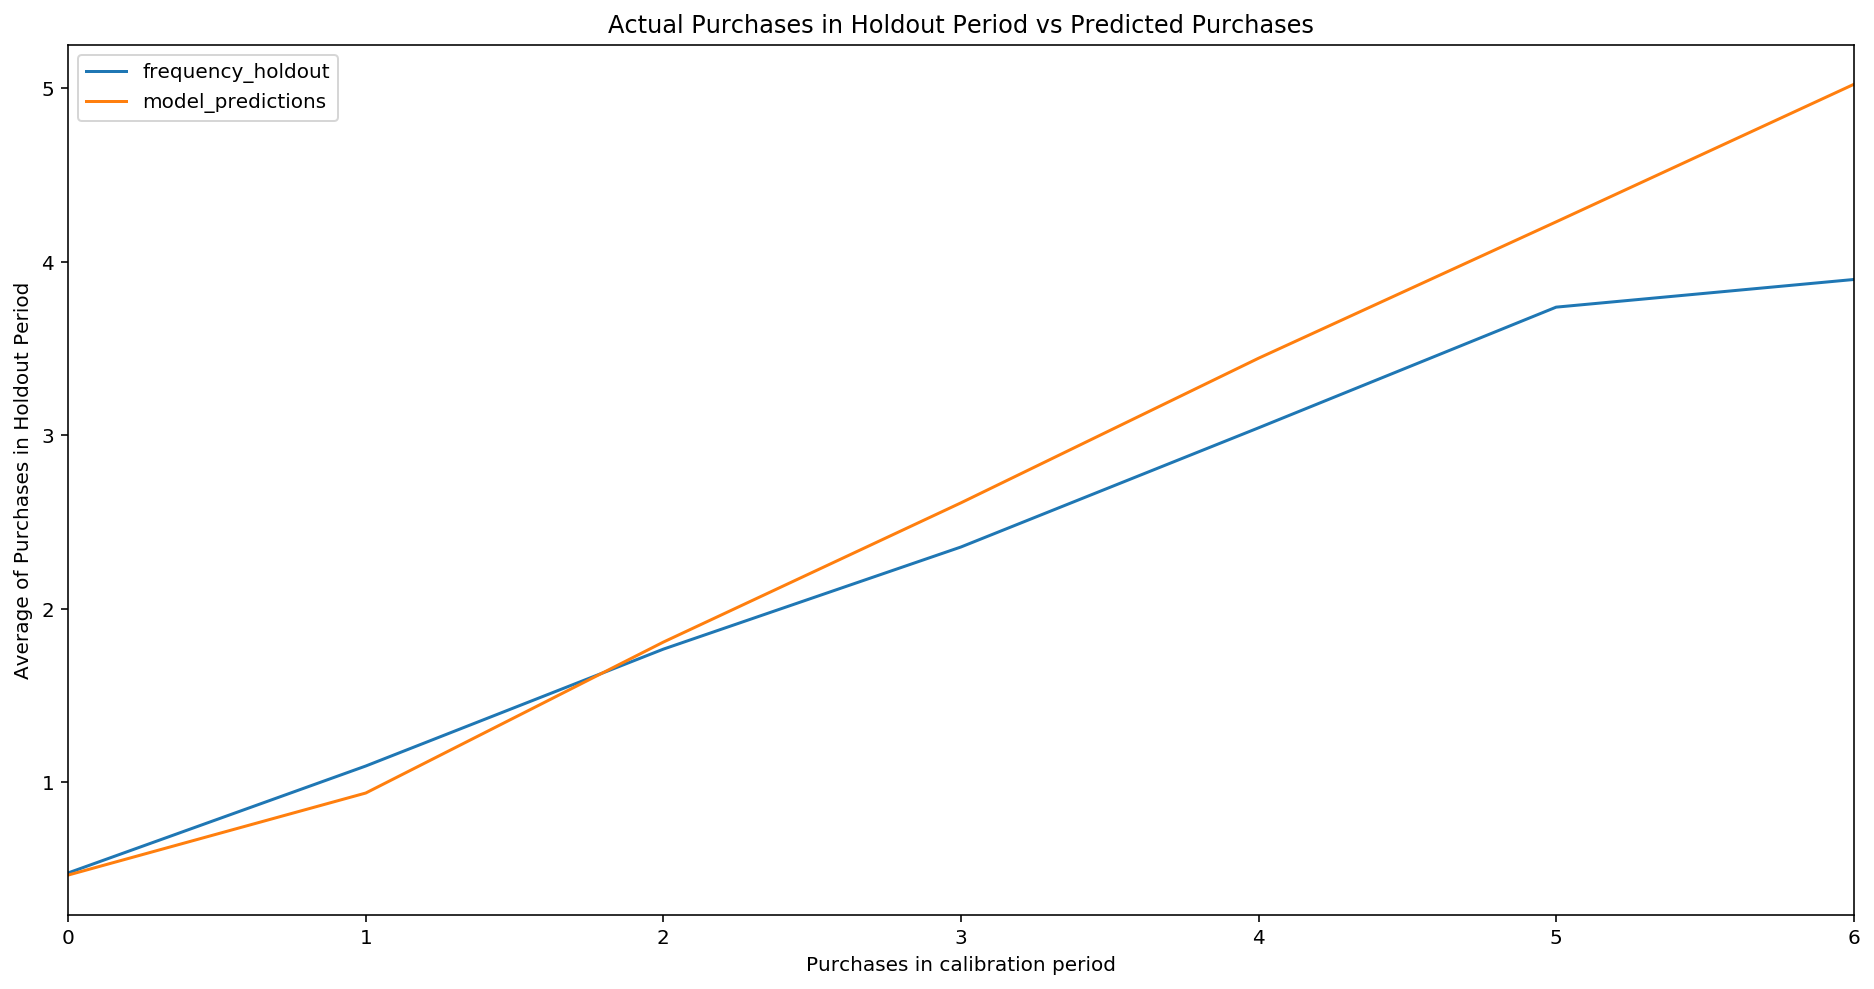

In [36]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

# Model summary
bgf.summary

In [38]:
# We can visualize one particular customer
from lifetimes.plotting import plot_history_alive

# id = 2244229397 
id = 7004575757
#days_since_birth = 200
days_since_birth = round((pd.to_timedelta(pd.Timestamp('2020-01-01T00') 
                  - pd.Timestamp((df_ml[df_ml['club_card_number'] == id]['receipt_issue_date'].min()))).days) / 7)
sp_trans = df_ml.loc[df_ml['club_card_number'] == id]
plot_history_alive(bgf, 
                   days_since_birth, 
                   sp_trans, 
                   'receipt_issue_date',
                   xlim=['2017-11-01T00','2019-11-01T00']);

ValueError: cannot convert float NaN to integer

In [37]:
# Transform transaction data into customer-based data with three attributes
from lifetimes.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(df_ml, 
                                             'sfid', 
                                             'receipt_issue_date', 
                                             observation_period_end='2020-01-01',
                                             datetime_format = '%Y-%m-%d',
                                             freq='W',
                                             monetary_value_col = 'monetary_value')
summary.sample(2)

,frequency,recency,T,monetary_value
sfid,,,,
0031i000004v637AAA,0.0,0.0,46.0,0.00
0035800001XcxOOAAZ,1.0,56.0,81.0,25.98


In [38]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
# I am using some penalizer due to low sample size, see lifetimes documentation.
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.35,2.25e-03,0.34,0.35
alpha,14.70,1.39e-01,14.42,14.97
a,0.29,6.27e-03,0.27,0.30
b,1.16,2.59e-02,1.11,1.21


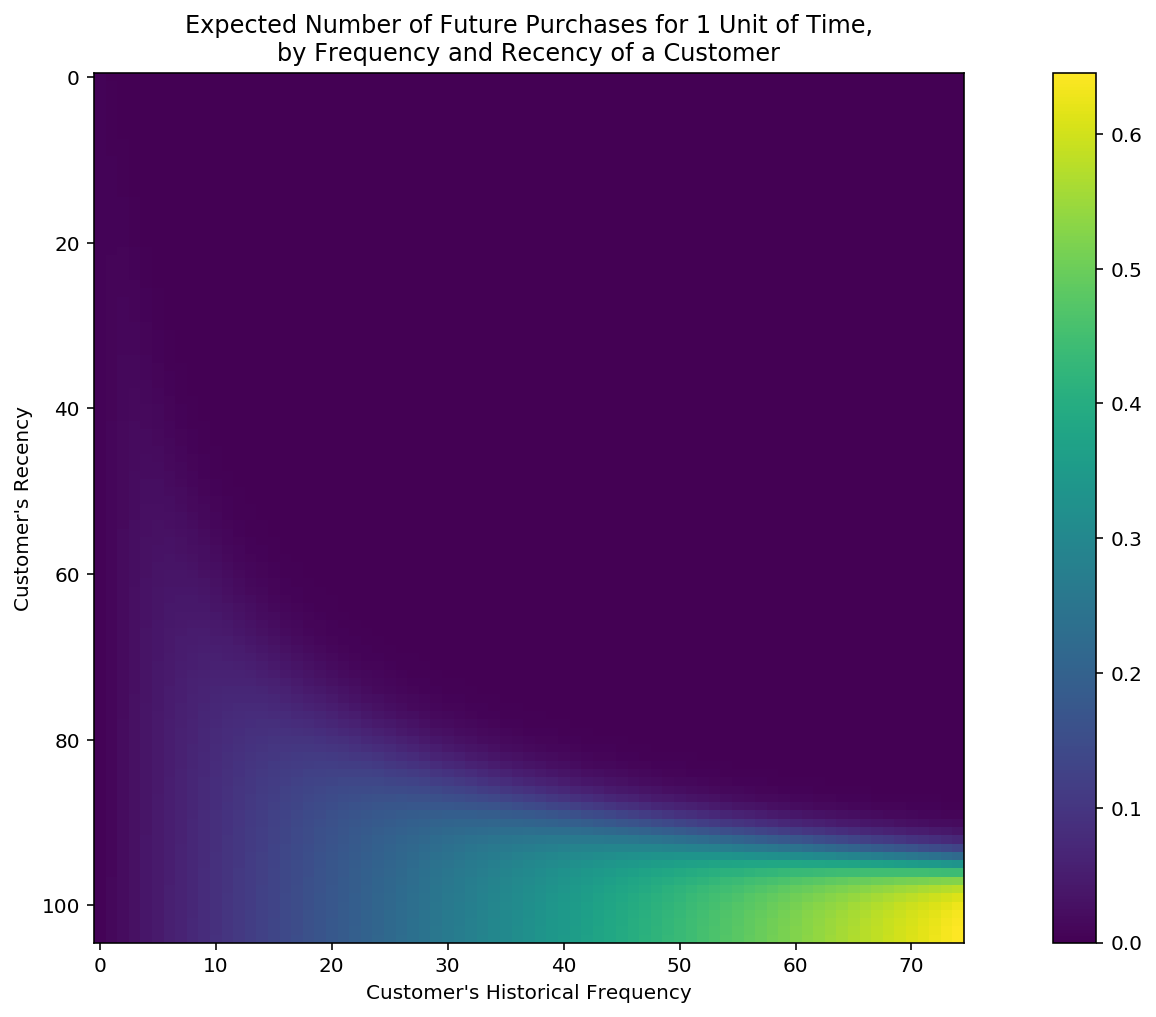

In [15]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

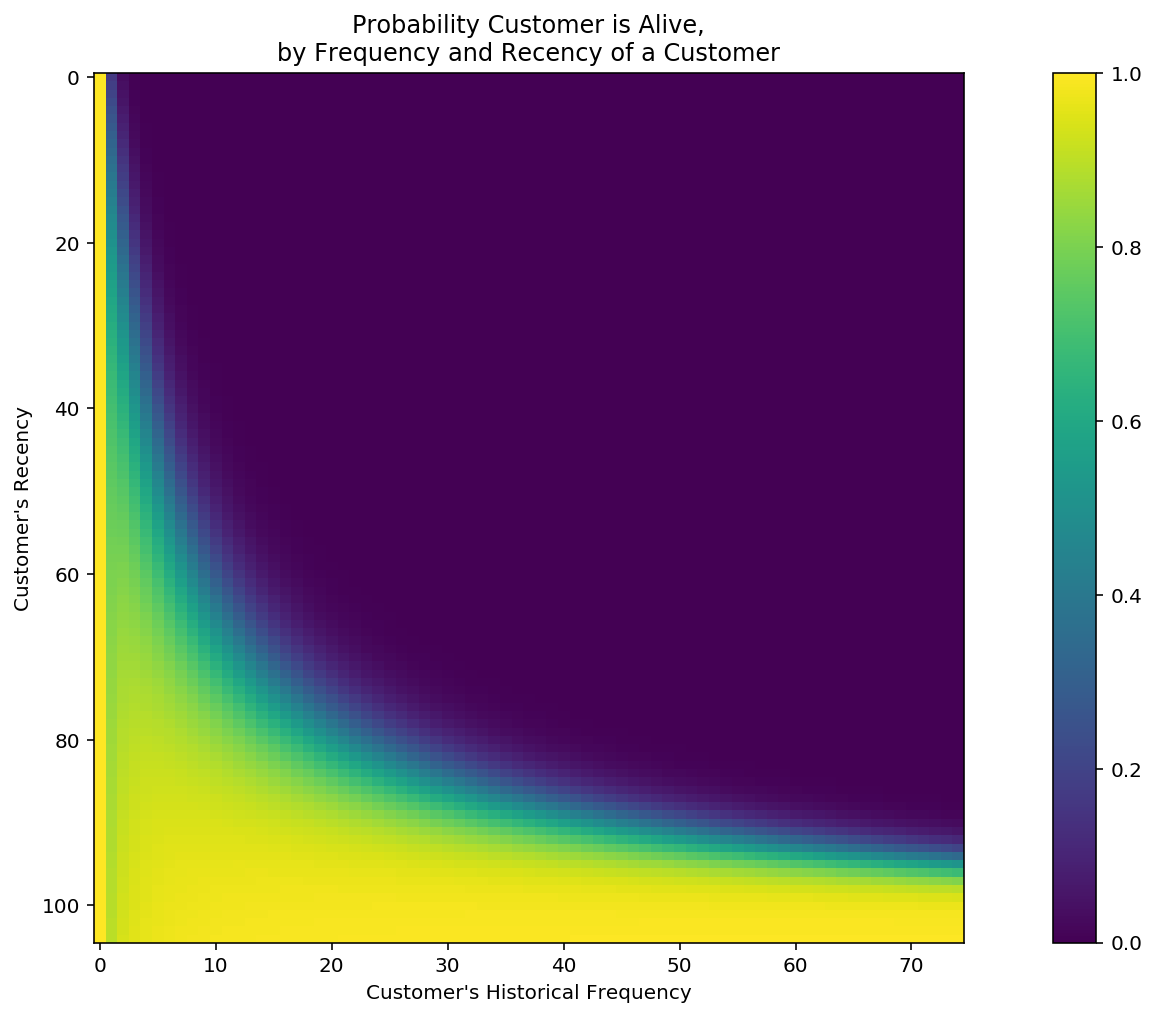

In [16]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [39]:
# Add predicted purchases to summary dataframe
# Predicted purchases are calculated for a given time window t
t = 4
summary['pred_purch_coming_week=' + str(t)] = (bgf.conditional_expected_number_of_purchases_up_to_time
                                               (
                                                t, 
                                                summary['frequency'], 
                                                summary['recency'], 
                                                summary['T']
                                               )
                                              )


                    frequency  recency      T  monetary_value  \
sfid                                                            
0035800001IvEpBAAV       35.0     46.0  102.0          164.67   
0035800001LJrmyAAD       26.0     35.0   99.0           43.77   
0035800001IGthRAAT       16.0     24.0  103.0           55.20   
0035800001Ppe20AAB       25.0     35.0   91.0          125.22   
0035800001aY0gfAAC       26.0     31.0   76.0           52.63   

                    pred_purch_coming_week=4  
sfid                                          
0035800001IvEpBAAV                  1.37e-08  
0035800001LJrmyAAD                  2.87e-08  
0035800001IGthRAAT                  3.97e-07  
0035800001Ppe20AAB                  4.15e-07  
0035800001aY0gfAAC                  1.52e-06  

[5 rows x 5 columns]


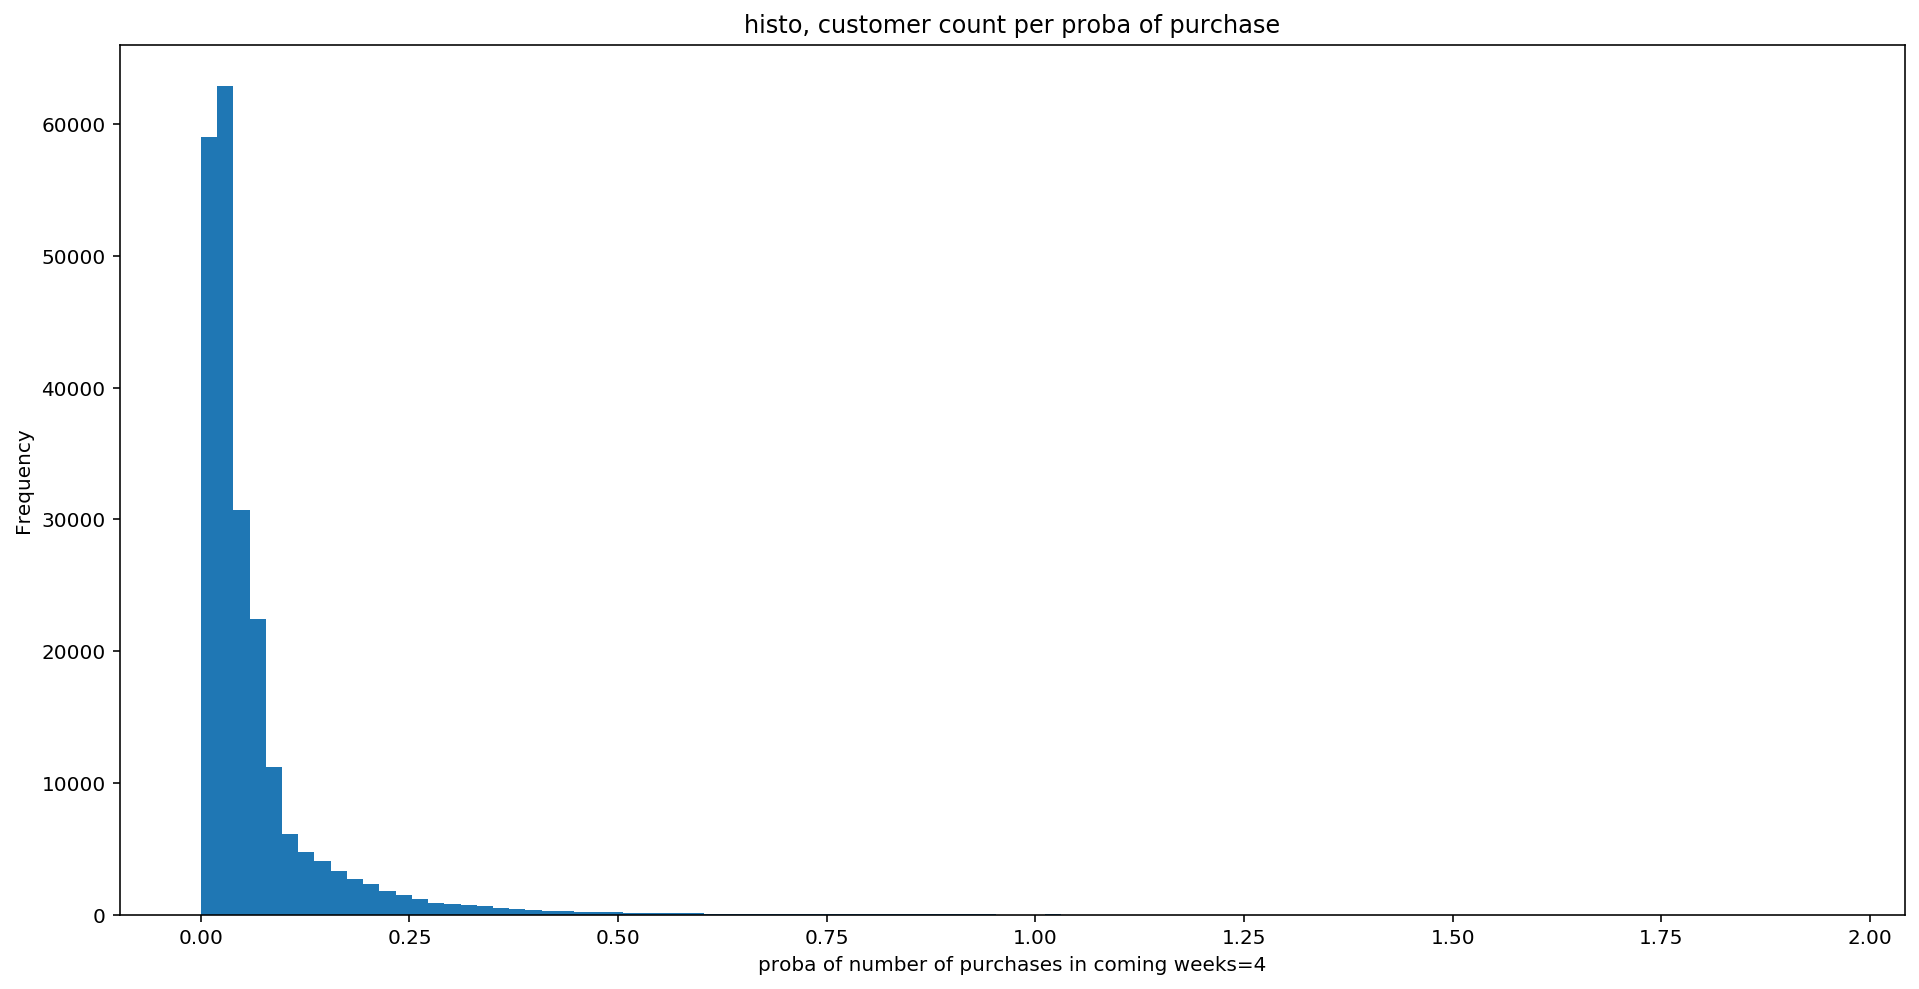

In [40]:
print(summary.sort_values(by='pred_purch_coming_week=' + str(t)).head(5))
summary['pred_purch_coming_week=' + str(t)].plot(kind='hist',bins=100)
plt.xlabel('proba of number of purchases in coming weeks=' +str(t))
plt.title('histo, customer count per proba of purchase');

#### Would be nice to cluster the data using the predicted purchase data

In [70]:
quartile_cut = pd.qcut(summary['pred_purch_coming_week=' + str(t)],
                        [0, .25, .5, .75, 1.], 
                        labels=['Low','Low-Med','High-Med','High'],
                        retbins=True) 

pd.DataFrame(quartile_cut[0])

,pred_purch_coming_week=4
SFID,
0031i000001rNG6AAM,High
0031i000001rNGMAA2,Low
0031i000001rNGRAA2,Low-Med
0031i000001rNGTAA2,Low-Med
0031i000001rNH4AAM,Low
...,...
0035800001gxbOuAAI,High-Med
0035800001gxbWUAAY,High
0035800001gxbWWAAY,Low


Predicted purchases are computed based on recency frequency, and T, as suggested by the high correlation coeff <br>
PCA (which incidentally reduces correlation coeff between attributes) is not gonna help here, because using these attributes would be redundant <br>
I am going to use the monetary value, and see if I can cluster the data

In [ ]:
summary.loc[summary['monetary_value'] < 0]

### I need to scale the data because my attributes have uncomparable scales

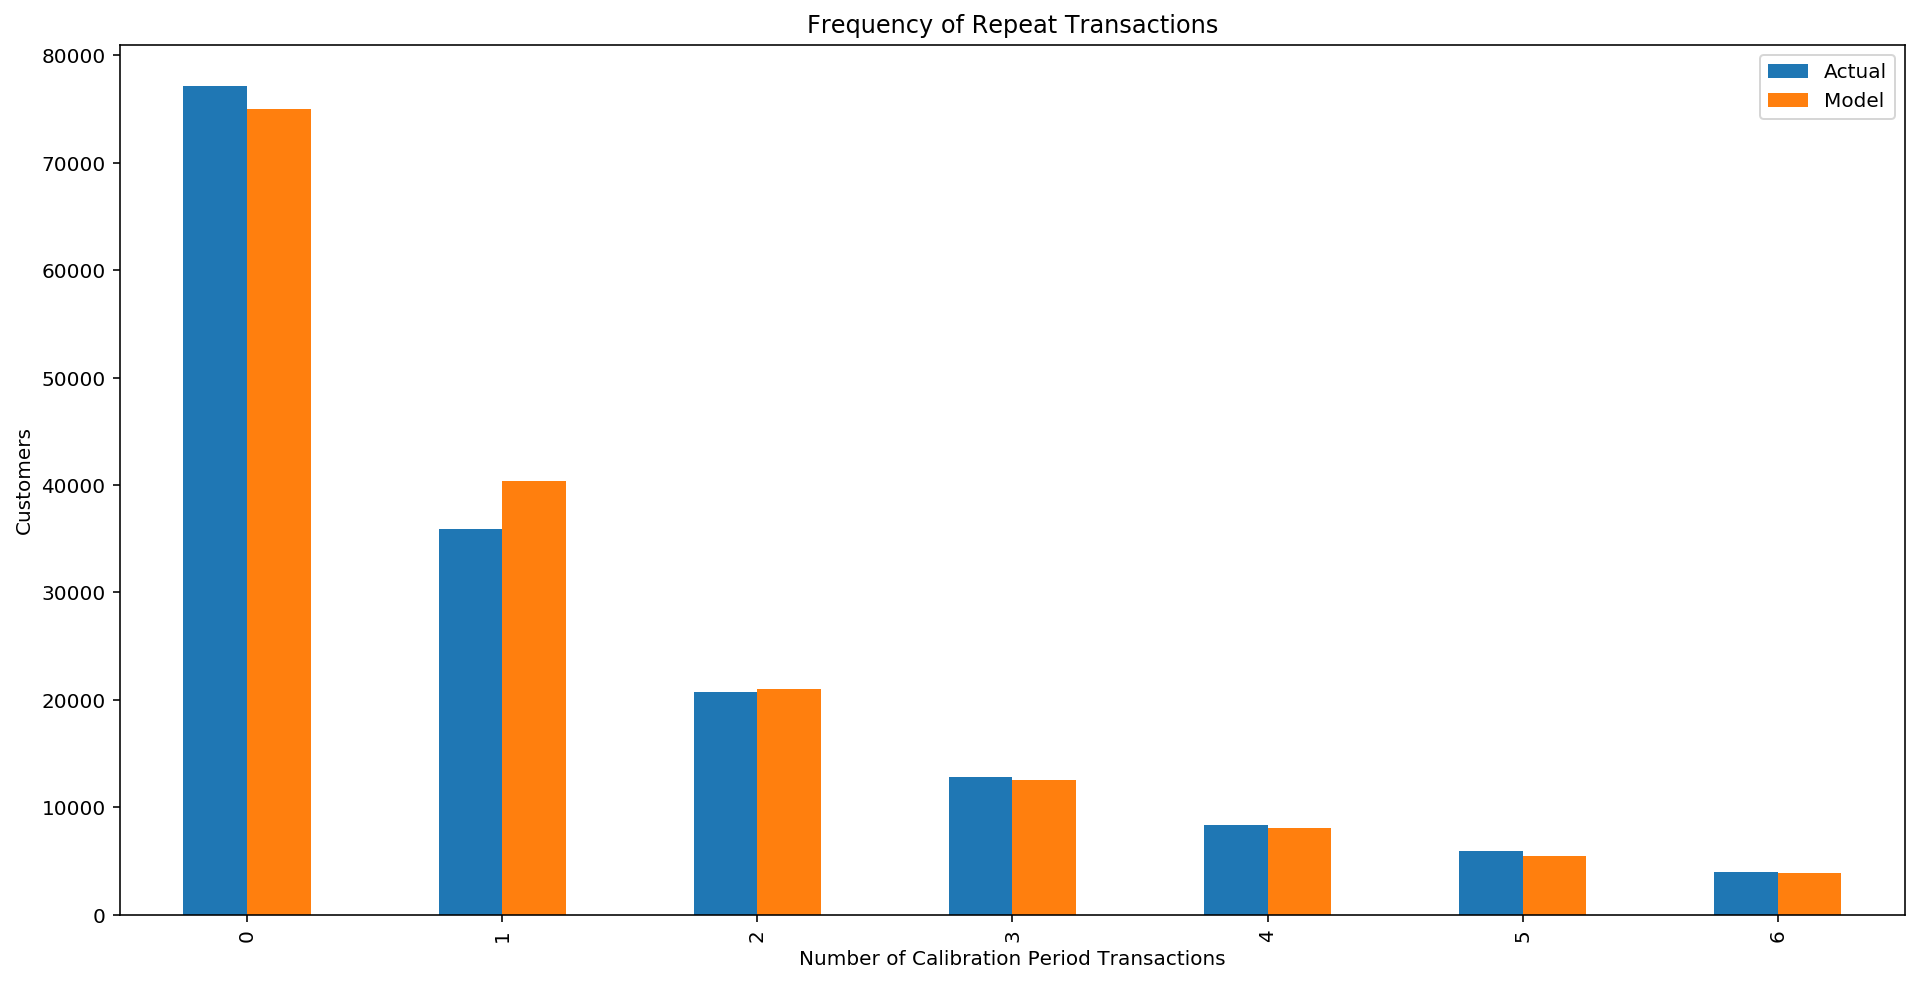

In [44]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [72]:
# Based on customer history, we can predict what an individuals future purchases might look like:
t = 4 #predict purchases in t periods
individual = summary.iloc[12386]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.04594889114486661

## Including transactional component

### The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel

In [28]:
returning_customers_summary = summary[summary['frequency']>0]
returning_customers_summary = returning_customers_summary[returning_customers_summary['monetary_value']>0]

In [29]:
returning_customers_summary#[['monetary_value', 'frequency']].corr()

,frequency,recency,T,monetary_value,pred_purch_coming_week=4
club_card_number,,,,,
1000137353,1.0,23.0,28.0,97.56,0.10
1000267135,1.0,30.0,70.0,45.97,0.04
1000283442,9.0,65.0,69.0,29.56,0.42
1000308192,3.0,53.0,74.0,66.08,0.12
1000333831,1.0,8.0,65.0,17.99,0.03
...,...,...,...,...,...
9501278308,1.0,16.0,18.0,20.47,0.13
9501324663,1.0,10.0,19.0,23.99,0.11
9501327267,1.0,3.0,30.0,67.98,0.06


In [22]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 117020 subjects, p: 1.86, q: 7.11, v: 92.53>


In [23]:
ggf.conditional_expected_average_profit(returning_customers_summary['frequency'],
                                        returning_customers_summary['monetary_value'])

SFID
0031i000001rNG6AAM    32.35
0031i000001rNGMAA2    23.49
0031i000001rNGRAA2    23.55
0031i000001rNGTAA2    37.39
0031i000001rNH5AAM    45.71
                      ...  
0035800001gxbOqAAI    30.10
0035800001gxbOuAAI    14.86
0035800001gxbWUAAY    17.37
0035800001gxbWXAAY    29.82
0035800001gxbWkAAI    21.43
Length: 117020, dtype: float64

In [25]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).mean(),
    returning_customers_summary[returning_customers_summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 28.213612100866484, Average profit: 27.720022250879882


In [26]:
# refit the BG model to the summary_with_money_value dataset
bgf.fit(returning_customers_summary['frequency'], 
        returning_customers_summary['recency'], 
        returning_customers_summary['T'],
        returning_customers_summary['monetary_value'])

<lifetimes.BetaGeoFitter: fitted with 117020 subjects, a: 0.21, alpha: 22.48, b: 1.32, r: 2.17>

In [27]:
clv = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    returning_customers_summary['frequency'],
    returning_customers_summary['recency'],
    returning_customers_summary['T'],
    returning_customers_summary['monetary_value'],
    time=12, # months
    discount_rate=0.01,# monthly discount rate ~ 12.7% annually
    freq = 'W')

In [28]:
clv

SFID
0031i000001rNG6AAM    108.28
0031i000001rNGMAA2      9.06
0031i000001rNGRAA2     43.58
0031i000001rNGTAA2     50.25
0031i000001rNH5AAM      5.08
                       ...  
0035800001gxbOqAAI    212.12
0035800001gxbOuAAI     30.48
0035800001gxbWUAAY    104.24
0035800001gxbWXAAY     73.40
0035800001gxbWkAAI     27.26
Name: clv, Length: 117020, dtype: float64

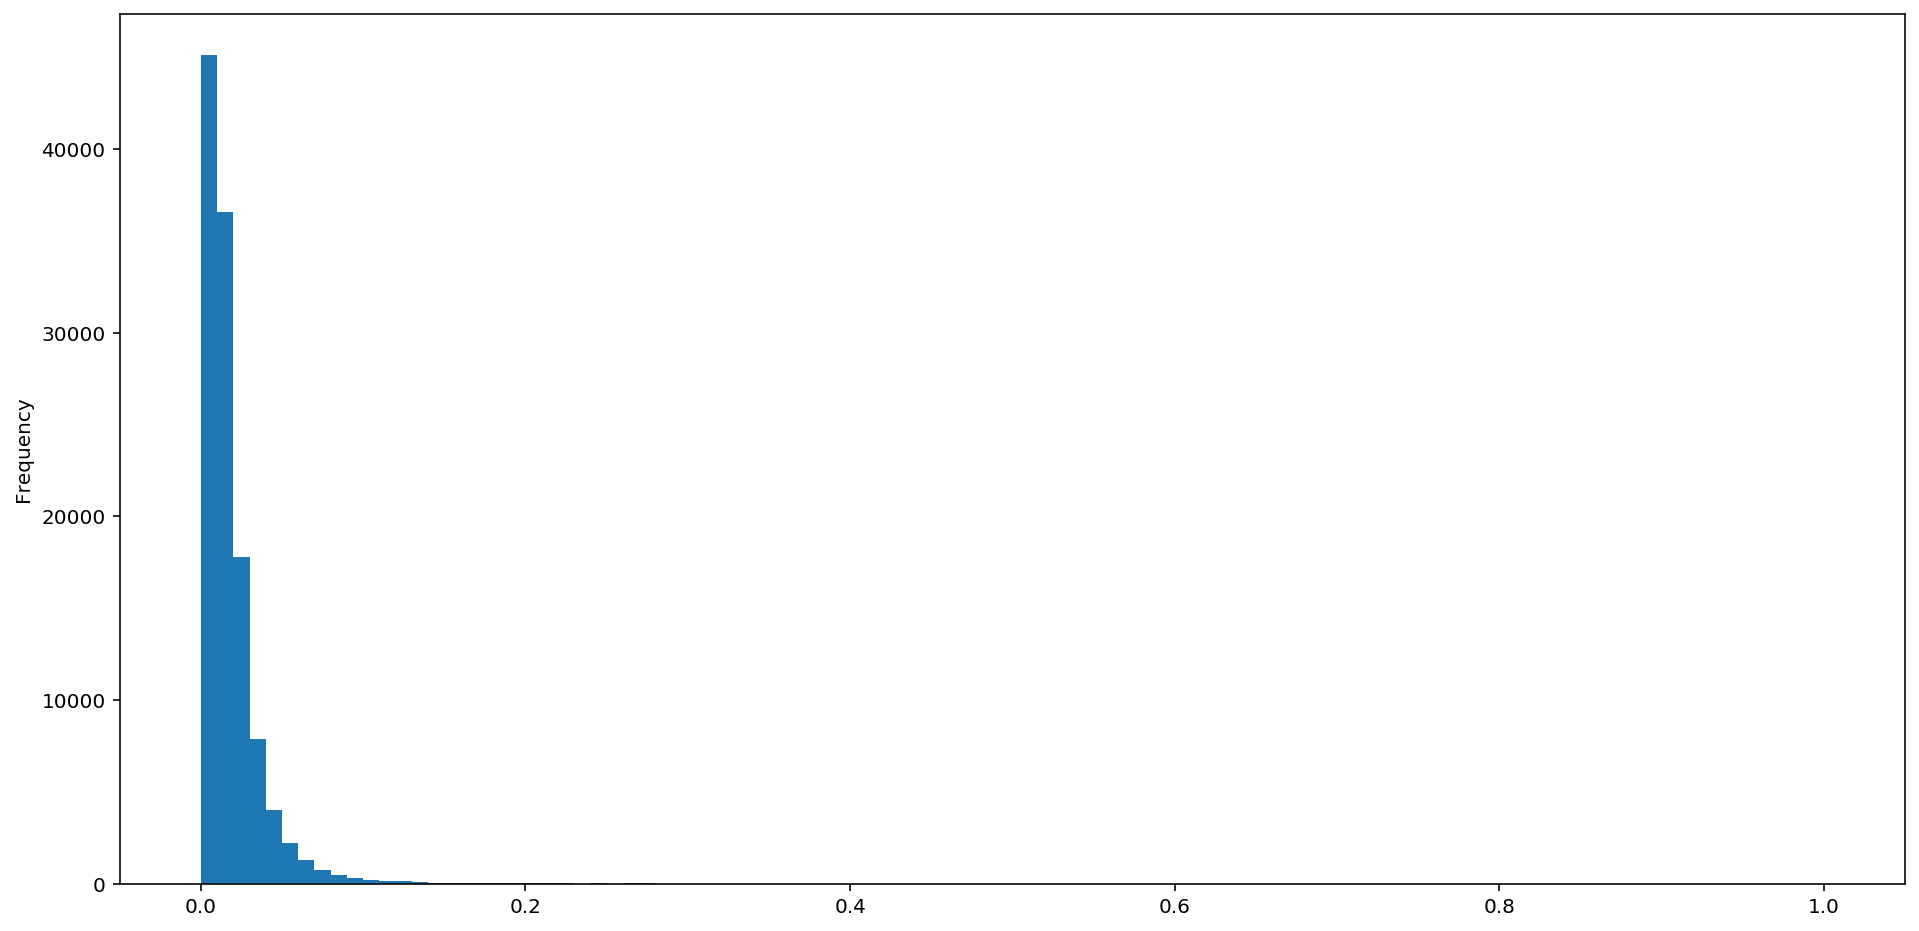

In [30]:
normalize(clv).plot(kind='hist', bins = 100)

# Comparing DeFacto & Orsay WM scoring

In [41]:
score = summary['pred_purch_coming_week=4']

In [42]:
def normalize(df):
    result = df.copy()
    #for feature_name in df.columns:
    result = result.values
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

In [44]:
df_defacto.columns = [c.lower() for c in df_defacto.columns]

In [46]:
df_orsay = summary.copy()
df_orsay = df_orsay.assign(norm_purchase = lambda d: normalize(d['pred_purch_coming_week=4']))
df_orsay.reset_index(level=0, inplace=True)
df_orsay

In [53]:
merged_orsay_defacto_data = df_orsay.merge(df_defacto, on='sfid', how='inner')

In [54]:
merged_orsay_defacto_data.shape

(202169, 9)

In [55]:
merged_orsay_defacto_data.corr()

,frequency,recency,T,monetary_value,pred_purch_coming_week=4,norm_purchase,score
frequency,1.00,0.70,0.24,0.44,0.86,0.86,0.56
recency,0.70,1.00,0.40,0.50,0.55,0.55,0.36
T,0.24,0.40,1.00,0.14,-0.07,-0.07,-0.13
monetary_value,0.44,0.50,0.14,1.00,0.39,0.39,0.33
pred_purch_coming_week=4,0.86,0.55,-0.07,0.39,1.00,1.00,0.64
norm_purchase,0.86,0.55,-0.07,0.39,1.00,1.00,0.64
score,0.56,0.36,-0.13,0.33,0.64,0.64,1.00


In [52]:
merged_orsay_defacto_data.corr()

,frequency,recency,T,monetary_value,pred_purch_coming_week=4,norm_purchase,Score
frequency,1.00,0.68,0.35,0.38,0.90,0.90,0.75
recency,0.68,1.00,0.57,0.49,0.54,0.54,0.52
T,0.35,0.57,1.00,0.22,0.04,0.04,0.04
monetary_value,0.38,0.49,0.22,1.00,0.36,0.36,0.36
pred_purch_coming_week=4,0.90,0.54,0.04,0.36,1.00,1.00,0.82
norm_purchase,0.90,0.54,0.04,0.36,1.00,1.00,0.82
Score,0.75,0.52,0.04,0.36,0.82,0.82,1.00


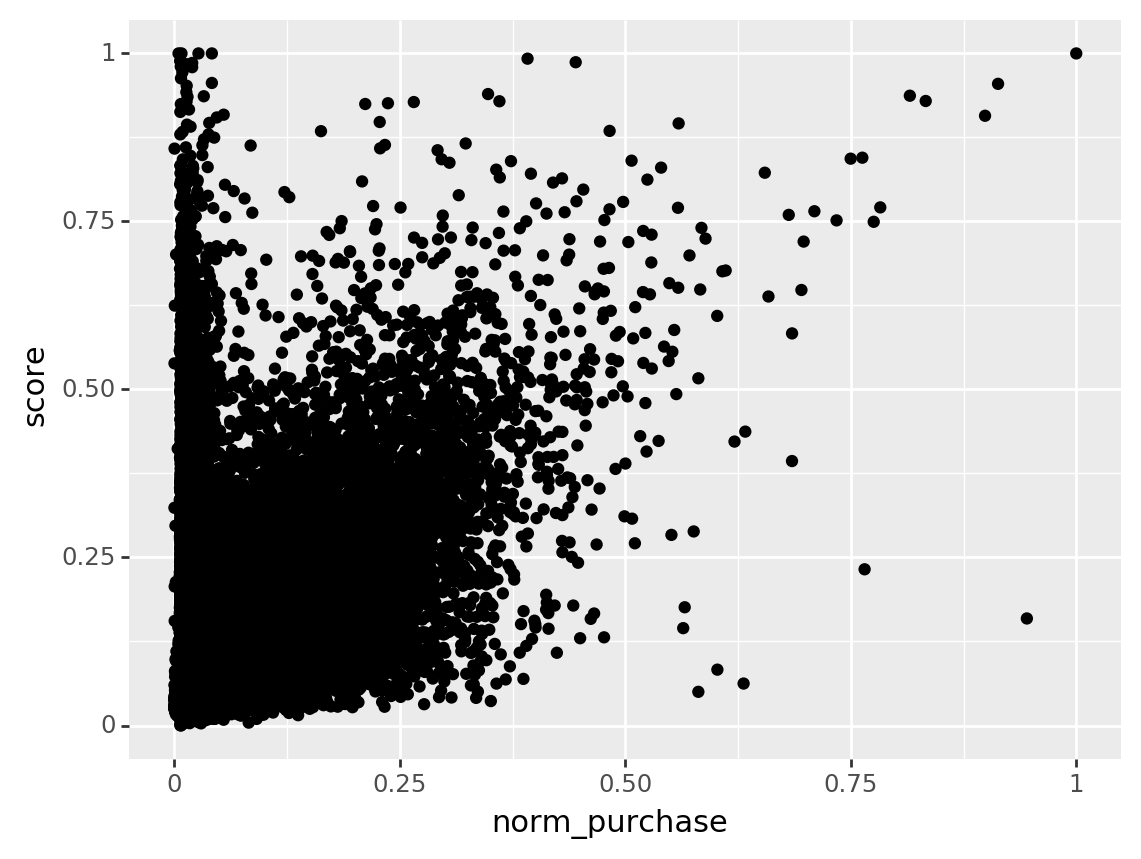

<ggplot: (-9223371891483682024)>

In [56]:
(p9.ggplot(mapping=p9.aes(x='norm_purchase', y='score'), data=merged_orsay_defacto_data)
+ p9.geom_point())

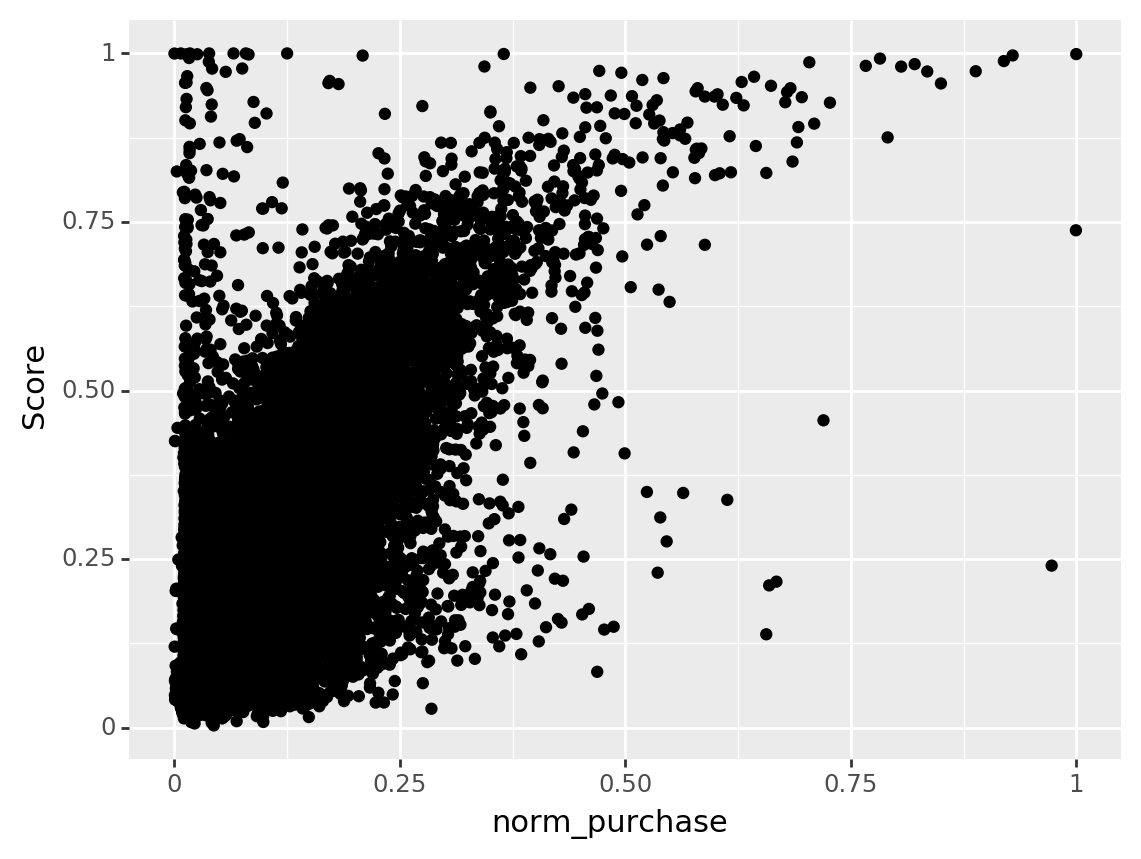

<ggplot: (-9223371880046316940)>

In [53]:
(p9.ggplot(mapping=p9.aes(x='norm_purchase', y='Score'), data=merged_orsay_defacto_data)
+ p9.geom_point())

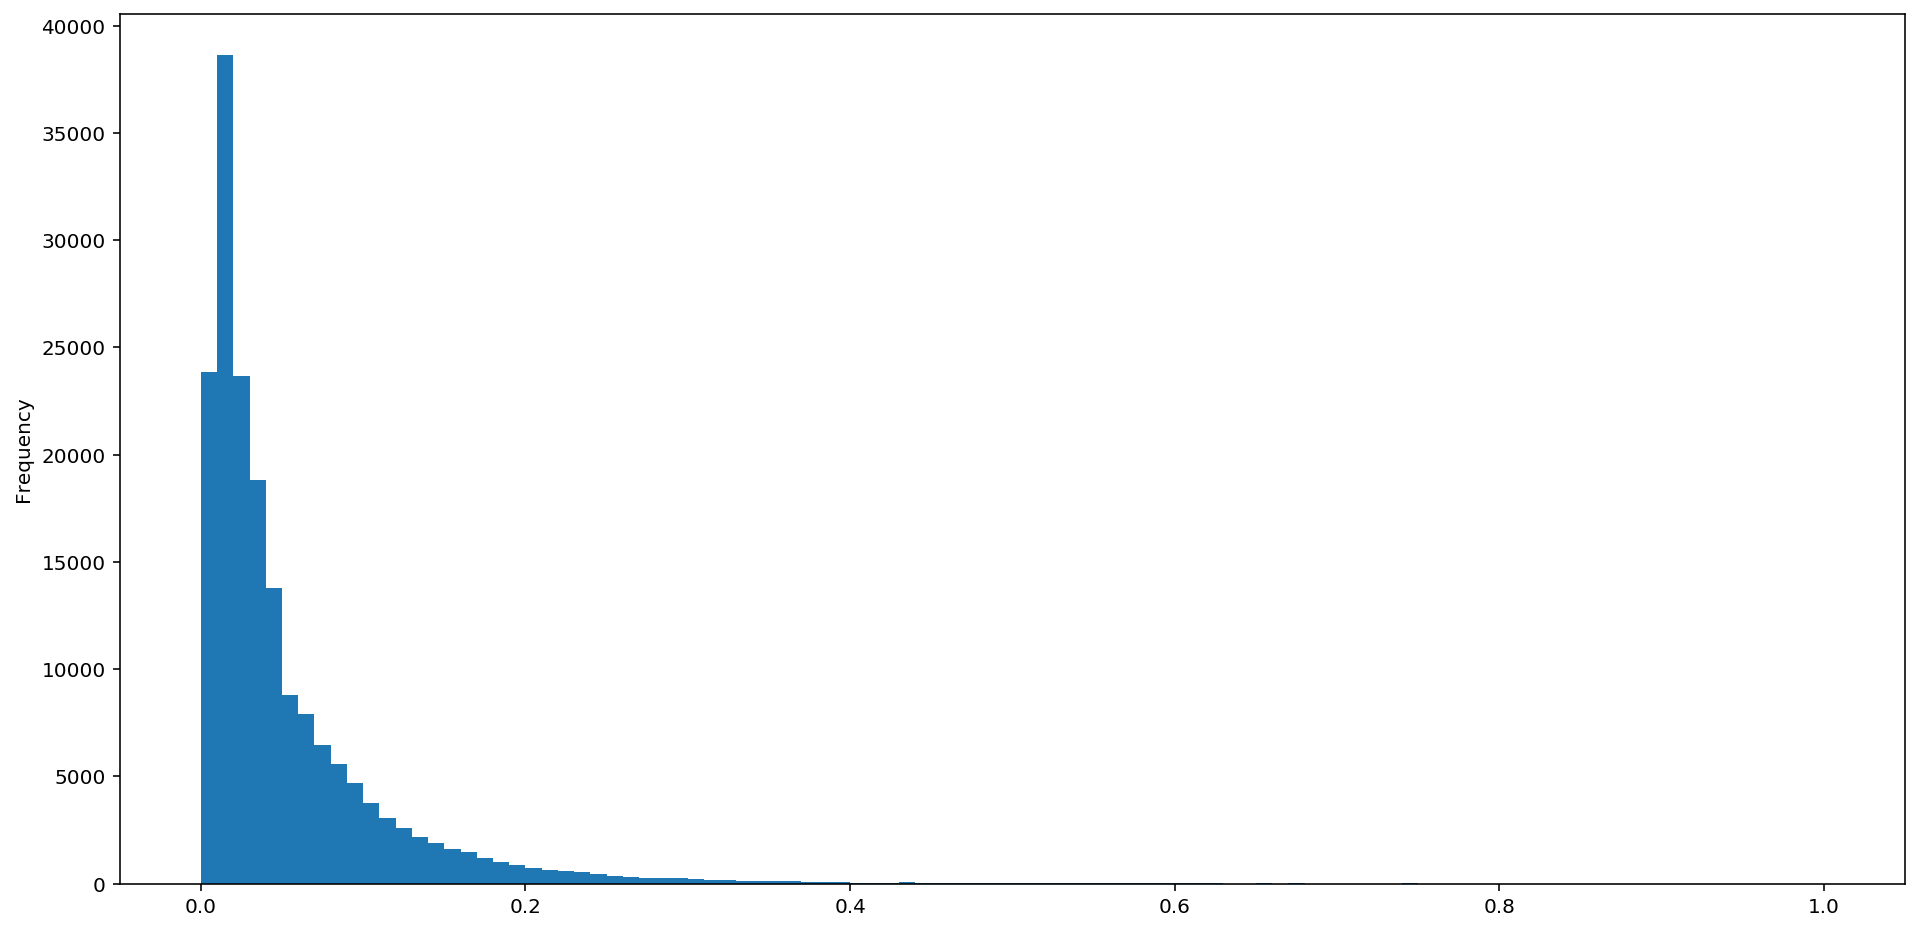

In [37]:
merged_orsay_defacto_data.norm_purchase.plot(kind='hist', bins=100)

In [27]:
merged_orsay_defacto_data

,SFID,frequency,recency,T,monetary_value,pred_purch_coming_week=4,norm_purchase,ScoringIdentifier,Score
0,0031i000001rNG6AAM,3.0,37.0,41.0,36.88,0.26,8.00e-02,Spring Special 2020,0.29
1,0031i000001rNGMAA2,1.0,13.0,68.0,8.02,0.04,1.10e-02,Spring Special 2020,0.03
2,0031i000001rNGTAA2,2.0,36.0,68.0,52.46,0.09,2.94e-02,Spring Special 2020,0.11
3,0031i000001rNH4AAM,0.0,0.0,68.0,0.00,0.03,8.31e-03,Spring Special 2020,0.04
4,0031i000001rNH5AAM,2.0,3.0,68.0,74.42,0.01,3.43e-03,Spring Special 2020,0.03
...,...,...,...,...,...,...,...,...,...
177998,0035800001gxbOuAAI,8.0,38.0,68.0,9.38,0.16,5.03e-02,Spring Special 2020,0.18
177999,0035800001gxbWUAAY,10.0,64.0,68.0,13.82,0.53,1.63e-01,Spring Special 2020,0.21
178000,0035800001gxbWWAAY,0.0,0.0,68.0,0.00,0.03,8.31e-03,Spring Special 2020,0.04
178001,0035800001gxbWXAAY,6.0,40.0,68.0,30.71,0.21,6.37e-02,Spring Special 2020,0.13
